In [91]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pixell import enmap, reproject, enplot
from matplotlib import cm
from astropy.io import fits
import matplotlib.patches as patches

In [40]:
def eshow(x,**kwargs): 
    ''' Define a function to help us plot the maps neatly '''
    plots = enplot.get_plots(x, **kwargs)
    enplot.show(plots, method = "ipython")

In [10]:
radius = 250
df_clus = pd.read_csv(f'Data/z_gt_4_lt_7/ACT_clus_available_{radius}.csv',
                                           index_col = 0)
df_clus.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h]
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,172.538910,9.477047,0.541937,2.395269,3071.716602,-715.732478,-245.624637,501.121430
std,96.818295,6.493559,0.085419,0.826845,412.919360,2516.798882,1528.313044,350.645097
min,0.113536,-7.212459,0.400034,1.327872,2365.135785,-3667.341017,-3444.250363,-421.495299
25%,130.219023,4.668808,0.462638,1.821738,2689.122484,-2718.645742,-1547.140644,238.619215
50%,188.283665,10.046516,0.542735,2.180758,3086.257343,-2004.839473,-246.150935,528.826379
75%,226.092973,14.724819,0.616769,2.779336,3436.565951,2432.642822,1047.412555,776.849493
max,359.886623,20.232137,0.699912,8.132106,3811.609493,3759.638002,3200.001426,1236.427091


In [111]:
radius = 250
cell_size = 5000
df_clus = pd.read_csv(f'Data/with_vels/z_gt_4_lt_7_{radius}_{cell_size}.csv',
                                           index_col = 0)
df_clus.describe()

,RADeg,decDeg,redshift,M500,r_comov[Mpc/h],x_comov[Mpc/h],y_comov[Mpc/h],z_comov[Mpc/h],x_comov[kpc/h],y_comov[kpc/h],z_comov[kpc/h],vx_est[km/s],vy_est[km/s],vz_est[km/s],vx_est_err[km/s],vy_est_err[km/s],vz_est_err[km/s],r_mag[kpc/h],v_los_est[km/s],v_los_est_err[km/s]
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,8.020000e+02,8.020000e+02,8.020000e+02,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000,8.020000e+02,802.000000,802.000000
mean,172.538910,9.477047,0.541937,2.395269,3071.716602,-715.732478,-245.624637,501.121430,-7.157325e+05,-2.456246e+05,5.011214e+05,100.273219,80.235279,101.548479,12861.187862,12841.377723,12833.782157,3.071717e+06,-290.891077,12859.633949
std,96.818295,6.493559,0.085419,0.826845,412.919360,2516.798882,1528.313044,350.645097,2.516799e+06,1.528313e+06,3.506451e+05,3616.050225,3803.057330,3798.276903,10655.441386,10655.036883,10653.424476,4.129194e+05,3917.238155,10655.244978
min,0.113536,-7.212459,0.400034,1.327872,2365.135785,-3667.341017,-3444.250363,-421.495299,-3.667341e+06,-3.444250e+06,-4.214953e+05,-14596.444507,-21265.507968,-18532.025467,5067.329838,5068.424795,5066.311067,2.365136e+06,-17022.038267,5067.268566
25%,130.219023,4.668808,0.462638,1.821738,2689.122484,-2718.645742,-1547.140644,238.619215,-2.718646e+06,-1.547141e+06,2.386192e+05,-1504.743708,-1659.105265,-1666.197552,7169.471902,7167.288642,7168.788374,2.689122e+06,-2024.704373,7160.158906
50%,188.283665,10.046516,0.542735,2.180758,3086.257343,-2004.839473,-246.150935,528.826379,-2.004839e+06,-2.461509e+05,5.288264e+05,204.440265,125.584123,26.489403,9055.196305,9042.844637,9005.221667,3.086257e+06,-229.728769,9058.956900
75%,226.092973,14.724819,0.616769,2.779336,3436.565951,2432.642822,1047.412555,776.849493,2.432643e+06,1.047413e+06,7.768495e+05,1797.581459,1913.555425,1801.110132,14270.517464,14234.971905,14231.103459,3.436566e+06,1294.173672,14269.176032
max,359.886623,20.232137,0.699912,8.132106,3811.609493,3759.638002,3200.001426,1236.427091,3.759638e+06,3.200001e+06,1.236427e+06,22074.135934,15485.676204,17535.796039,154673.148004,154673.137819,154673.148284,3.811609e+06,21521.028822,154673.144242


In [112]:
df_clus['v_los_est[km/s]']

df_clus['RADeg']


0       4324.789162
1       -895.152530
2      -1681.277545
3       5855.959099
4     -13789.406051
           ...     
797     -451.538733
798     2007.228968
799      786.014537
800     2899.974719
801      996.453112
Name: v_los_est[km/s], Length: 802, dtype: float64

In [8]:
path = 'Data/Maps/'
imap_d56 = enmap.read_map(path + "act_planck_dr5.01_s08s18_AA_f150_night_map_d56_I.fits")

**1 Sep 2021**  
A: ACT are much better angular resolution than Planck. So for reconstucting cluster signal, especially small mass, ACT is really good.  
Probably ACT team has published component separated CMB map other than frequency (150 or 220) maps. We need a CMB map for kSZ. Otherwise, we'll have too much junk.  
It would be good if they have tSZ removed CMP map. There's Planck's (guess: LGA CMB) map which is tSZ removed. Otherwise, there's a little residual tSZ that leaks into CMB map and gets added in the stacking. These tSZ removed maps are called tSZ deprojected or tSZ zeroed maps.

In [25]:
hdul = fits.open(path + "act_planck_dr5.01_s08s18_AA_f150_night_map_d56_I.fits")
# hdul[1].header
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6426                                                  
NAXIS2  =                 1416                                                  
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =               3397.0 / Pixel coordinate of reference point            
CRPIX2  =                906.0 / Pixel coordinate of reference point            
CDELT1  =    -0.00833333333333 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---CAR'        

In [26]:
type(enmap)

module

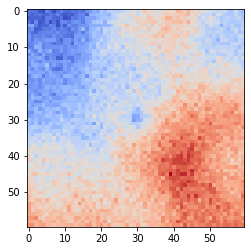

In [19]:
# Choose an object from the catalog
# --------  Try Changing this number to look at different clusters -------- 
n = 129   # <<<<<<<<

ra = df_clus['RADeg'][n]
dec = df_clus['decDeg'][n]
width = 30/60.

# Build the box around the object and cut out a submap from the larger map
box = np.deg2rad([[dec-width/2.,ra-width/2.],[dec+width/2.,ra+width/2.]])

stamp = imap_d56.submap(box)


# Visualize the submap
plt.imshow(stamp, cmap = cm.coolwarm)

Text(0.5, 0, 'Degrees')

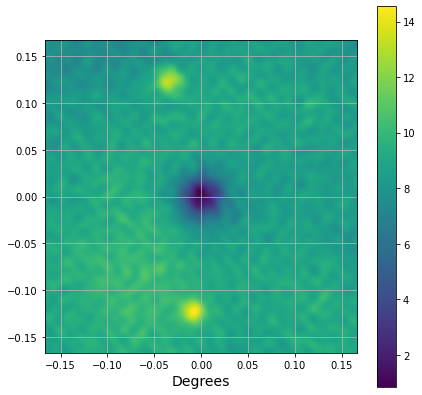

In [22]:
# N = len(ras)
stack = 0
c = 0 # counter to check how many thumbnails we are stacking

# Set the size of the stamp:
r_arcmin = 10.  #Define the radius of the image in arcminutes
r = r_arcmin*np.pi/(60 * 180)  # convert arcminutes to radians 


stamps = reproject.thumbnails(imap_d56, 
                              coords=np.deg2rad([df_clus['decDeg'], df_clus['RADeg']]).T, 
                              res=0.0000454440, r=r)

stack  = np.mean(stamps,0)

extent = [-r_arcmin/60., r_arcmin/60., -r_arcmin/60., r_arcmin/60.]

# Plot the Stack
plt.figure(figsize = (7,7))
plt.imshow(stack, extent = extent)
plt.grid(True)
plt.colorbar()
plt.xlabel("Degrees", fontsize = 14)

In [41]:
path = '/vol/arc10/data1/amirza/Thesis_Unsync/ACT_Data/compsep_maps/'
CMB_kSZ_D56 = enmap.read_map(path + "tilec_single_tile_D56_cmb_map_v1.2.0_joint.fits")
CMB_kSZ_deproject_tsz_D56 = enmap.read_map(path + "tilec_single_tile_D56_cmb_deprojects_comptony_map_v1.2.0_joint.fits")

In [67]:
print(CMB_kSZ_deproject_tsz_D56.shape)
print(CMB_kSZ_deproject_tsz_D56.wcs)

(1820, 6825)
car:{cdelt:[-0.008333,0.008333],crval:[15.47,0],crpix:[3598,1108]}


In [74]:
dec_min,ra_min = np.rad2deg(enmap.pix2sky(CMB_kSZ_deproject_tsz_D56.shape,
                           CMB_kSZ_deproject_tsz_D56.wcs,
                           np.array((0, 0))))
print(dec_min,ra_min)

-9.224999999996323 45.44166666668802


In [75]:
dec_max, ra_max = np.rad2deg(enmap.pix2sky(CMB_kSZ_deproject_tsz_D56.shape,
                           CMB_kSZ_deproject_tsz_D56.wcs,
                           np.array(CMB_kSZ_deproject_tsz_D56.shape)))
print(dec_max, ra_max)

5.941666666664296 -11.43333333328923


In [63]:
hdul = fits.open(path + "tilec_single_tile_D56_cmb_deprojects_comptony_map_v1.2.0_joint.fits")
# hdul[1].header
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 6825                                                  
NAXIS2  =                 1820                                                  
CRPIX1  =               3598.0 / Pixel coordinate of reference point            
CRPIX2  =               1108.0 / Pixel coordinate of reference point            
CDELT1  =    -0.00833333333333 / [deg] Coordinate increment at reference point  
CDELT2  =     0.00833333333333 / [deg] Coordinate increment at reference point  
CUNIT1  = 'deg'                / Units of coordinate increment and value        
CUNIT2  = 'deg'                / Units of coordinate increment and value        
CTYPE1  = 'RA---CAR'           / Right ascension, plate caree projection        
CTYPE2  = 'DEC--CAR'        

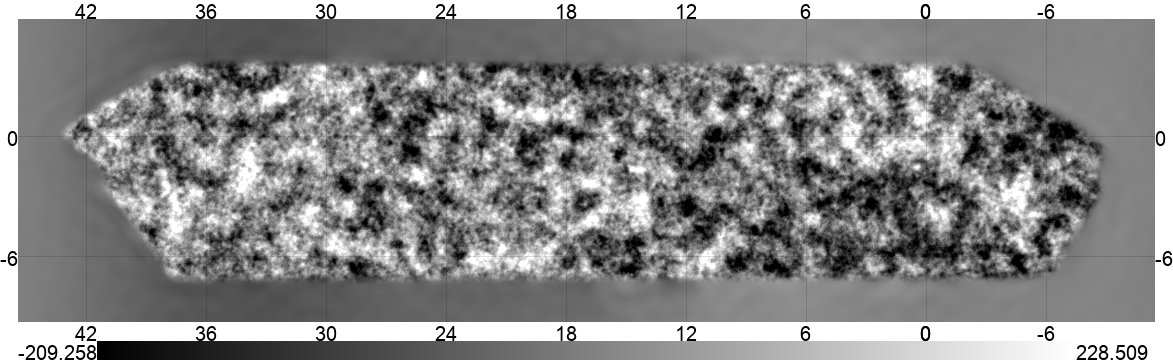

TypeError: eshow() takes 1 positional argument but 2 were given

In [54]:
eshow(CMB_kSZ_deproject_tsz_D56, **{'downgrade': 6, 'ticks': 6, 'color': 'gray', 'colorbar': True})
eshow(df_clus['RADeg'], df_clus['decDeg'])

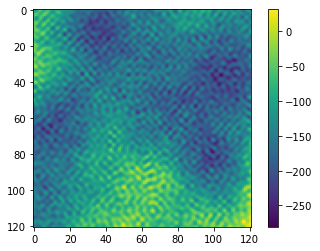

In [89]:
cutout = reproject.thumbnails(CMB_kSZ_D56 ,coords = np.deg2rad([-1, 18]),r = 15*np.pi/180/60)
plt.imshow(cutout)
plt.colorbar()

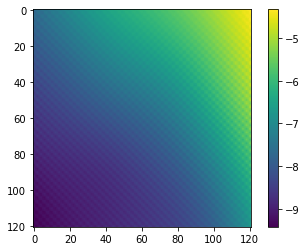

In [90]:
cutout = reproject.thumbnails(CMB_kSZ_D56 ,coords = np.deg2rad([-7, 43]),r = 15*np.pi/180/60)
plt.imshow(cutout)
plt.colorbar()

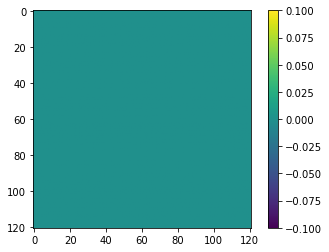

In [110]:
cutout = reproject.thumbnails(CMB_kSZ_D56 ,coords = np.deg2rad([-60, 80]),r = 15*np.pi/180/60)
plt.imshow(cutout)
plt.colorbar()

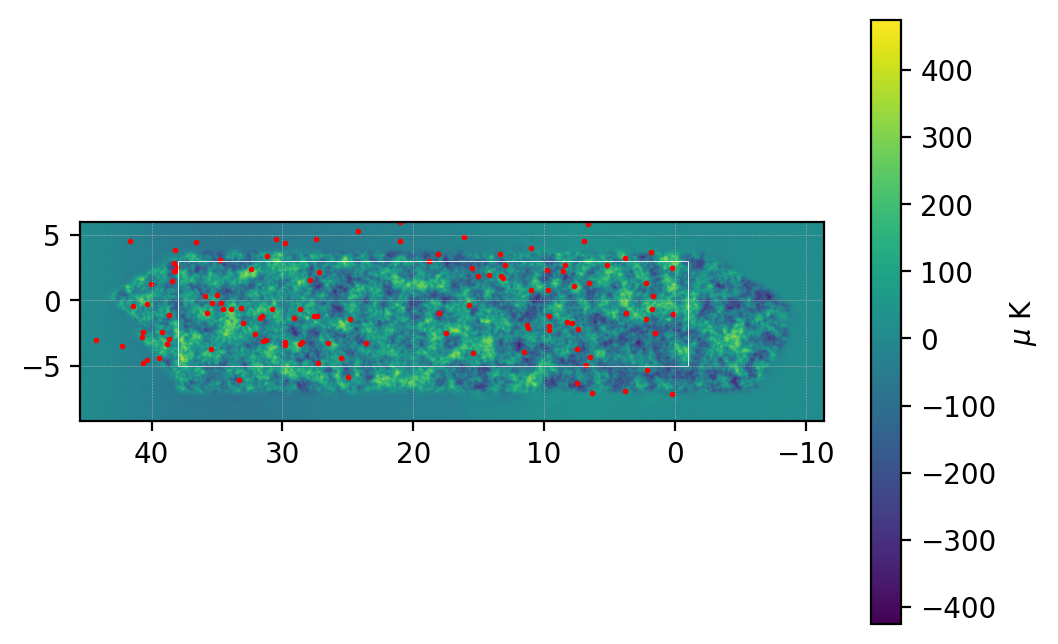

In [109]:
plt.figure(dpi = 200)
plt.scatter(df_clus['RADeg'], df_clus['decDeg'], c = 'r', s = 1)

plt.imshow(CMB_kSZ_deproject_tsz_D56, origin = 'lower',
           extent = [ra_min, ra_max, dec_min, dec_max])
plt.colorbar(label = '$\mu$ K')

rect = patches.Rectangle((38, -5), -39, 8, linewidth=0.3, edgecolor='white', facecolor='none')
plt.gca().add_patch(rect)

plt.grid(ls = 'dashed', lw = 0.2)

In [130]:
# hdu  = fits.open(path + 'E-D56Clusters.fits')
ras  = df_clus['RADeg']
decs = df_clus['decDeg']
vels = df_clus['v_los_est[km/s]']

N = len(ras)
stack_CMB_kSZ_pos           = 0
stack_CMB_kSZ_deproject_pos = 0
c = 0



df_clus['RADeg']


for i in range(N):
    # Extract stamps by reprojecting the map at the center of each source.
    
    if (-5 < decs[i] < 3) and (-1 < ras[i] < 38) and (vels[i] > 0):
    
        stamp_pos = reproject.thumbnails(CMB_kSZ_D56, 
                                     coords = np.deg2rad([decs[i], ras[i]]),
                                     r = 15*np.pi/180/60)

        stamp_deproject_pos = reproject.thumbnails(CMB_kSZ_deproject_tsz_D56,
                                               coords = np.deg2rad([decs[i], ras[i]]), 
                                               r = 15*np.pi/180/60)
    
#     if stamp is None or stamp_deproject is None: continue
    
        stack_CMB_kSZ_pos += stamp_pos 
        stack_CMB_kSZ_deproject_pos += stamp_deproject_pos
        c += 1
    

# Normalize the stamps
stack_CMB_kSZ_pos /= c
stack_CMB_kSZ_deproject_pos /= c
print(c)

41


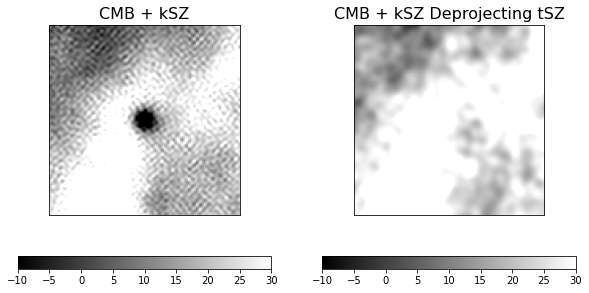

In [129]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ_pos, vmin = -10, vmax = 30, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject_pos, vmin = -10, vmax = 30, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

In [131]:
# hdu  = fits.open(path + 'E-D56Clusters.fits')
ras  = df_clus['RADeg']
decs = df_clus['decDeg']
vels = df_clus['v_los_est[km/s]']

N = len(ras)
stack_CMB_kSZ_neg           = 0
stack_CMB_kSZ_deproject_neg = 0
c = 0



df_clus['RADeg']


for i in range(N):
    # Extract stamps by reprojecting the map at the center of each source.
    
    if (-5 < decs[i] < 3) and (-1 < ras[i] < 38) and (vels[i] < 0):
    
        stamp_neg = reproject.thumbnails(CMB_kSZ_D56, 
                                     coords = np.deg2rad([decs[i], ras[i]]),
                                     r = 15*np.pi/180/60)

        stamp_deproject_neg = reproject.thumbnails(CMB_kSZ_deproject_tsz_D56,
                                               coords = np.deg2rad([decs[i], ras[i]]), 
                                               r = 15*np.pi/180/60)
    
#     if stamp is None or stamp_deproject is None: continue
    
        stack_CMB_kSZ_neg += stamp_neg 
        stack_CMB_kSZ_deproject_neg += stamp_deproject_neg
        c += 1
    

# Normalize the stamps
stack_CMB_kSZ_neg /= c
stack_CMB_kSZ_deproject_neg /= c
print(c)

30


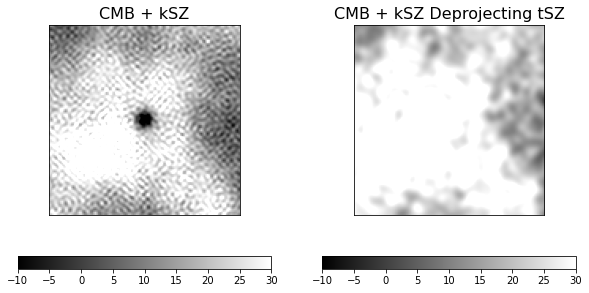

In [126]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ_neg, vmin = -10, vmax = 30, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject_neg, vmin = -10, vmax = 30, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

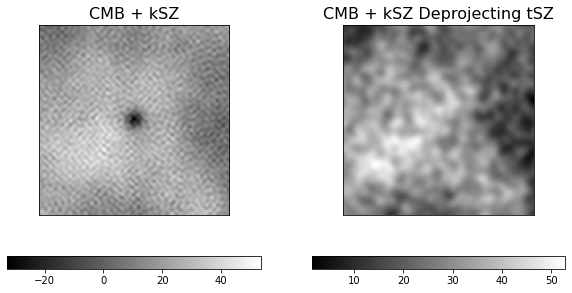

In [127]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ_neg, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject_neg, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

In [120]:
# hdu  = fits.open(path + 'E-D56Clusters.fits')
ras  = df_clus['RADeg']
decs = df_clus['decDeg']

N = len(ras)
stack_CMB_kSZ           = 0
stack_CMB_kSZ_deproject = 0
c = 0

for i in range(N):
    # Extract stamps by reprojecting the map at the center of each source.
    
    stamp = reproject.thumbnails(CMB_kSZ_D56, 
                                 coords = np.deg2rad([decs[i], ras[i]]),
                                 r = 15*np.pi/180/60)
    
    stamp_deproject = reproject.thumbnails(CMB_kSZ_deproject_tsz_D56,
                                           coords = np.deg2rad([decs[i], ras[i]]), 
                                           r = 15*np.pi/180/60)
    
    if stamp is None or stamp_deproject is None: continue
    
    stack_CMB_kSZ += stamp 
    stack_CMB_kSZ_deproject += stamp_deproject
    c += 1
    

# Normalize the stamps
stack_CMB_kSZ /= c
stack_CMB_kSZ_deproject /= c

In [121]:
c

802

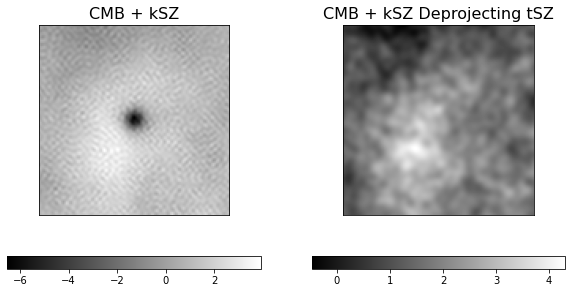

In [124]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()

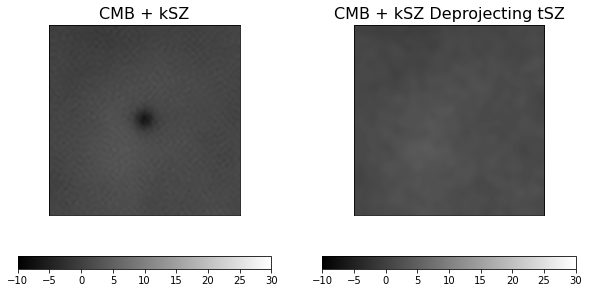

In [122]:
# Now we can plot both of these and compare

f, ax = plt.subplots(1,2, figsize=(10, 5))

f1 = ax[0].imshow(stack_CMB_kSZ, vmin = -10, vmax = 30, cmap = cm.gray)
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)
ax[0].set_title("CMB + kSZ", fontsize = 16)
plt.colorbar(mappable = f1, ax = ax[0],orientation='horizontal')

f2 = ax[1].imshow(stack_CMB_kSZ_deproject, vmin = -10, vmax = 30, cmap = cm.gray)
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)
ax[1].set_title("CMB + kSZ Deprojecting tSZ", fontsize = 16)
plt.colorbar(mappable = f2, ax = ax[1],orientation='horizontal')

plt.show()